In [1]:
"""
Author: Ryan Quirk, Huntley Hedrick, Matthew Griffith
Files: Analysis.ipynb, 
Project Description: 
"""

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_excel("soccer_data.xlsx") 

# First visualization shows the average number of goals per age ranges
# Age ranges are >20, 20-24, 25-29, 30+


age_count = {}
b20 = []
b25 = []
b30 = []
b35 = []
a35 = []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals"]

    if age in age_count.keys():
        age_count.update({age: age_count[age] + 1})
    else:
        age_count.update({age: 1})

    if age < 20:
        b20.append(goals)
        continue
    elif age < 25:
        b25.append(goals)
        continue
    elif age < 30:
        b30.append(goals)
        continue
    elif age < 35:
        b35.append(goals)
        continue
    else:
        a35.append(goals)

ranges = [">20", "20-24", "25-29", "30-34", "35+"]
values = [sum(b20)/len(b20), sum(b25)/len(b25), sum(b30)/len(b30), sum(b35)/len(b35), sum(a35)/len(a35) ]


### The Code Above:

Calculates the values for the plots below. It does this by iterating through the dataset and tallying each player that has a certain age. While iterating, it also checks for which age range the player belongs in and adds their goals to that age range. Finally with the goal values populated per each age range, create a list of the average goals per age range.

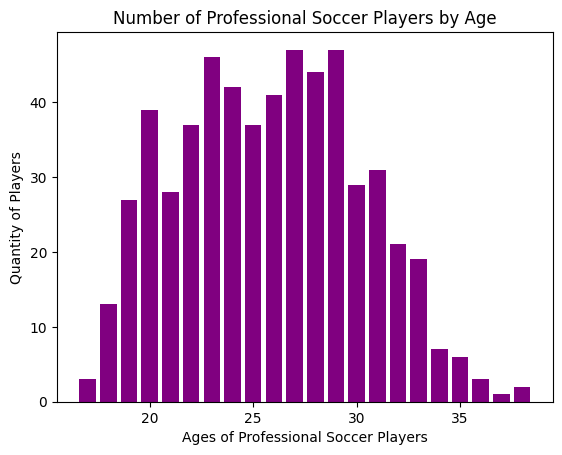

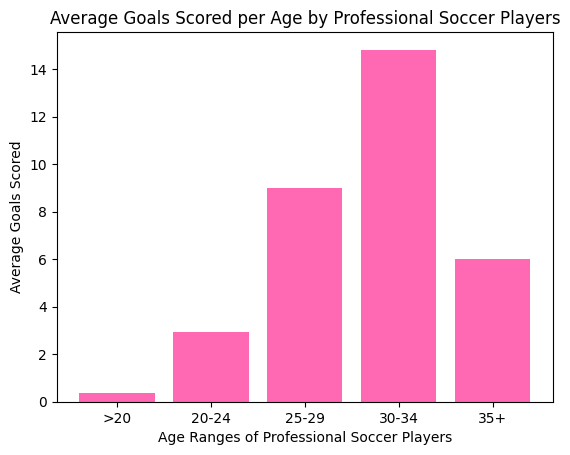

In [2]:
# Quantity of players sorted by age
plt.bar(age_count.keys(), age_count.values(), color="purple")
plt.xlabel("Ages of Professional Soccer Players")
plt.ylabel("Quantity of Players")
plt.title("Number of Professional Soccer Players by Age")
plt.show()


# Average Number of Goals Scored per Age Range
plt.bar(ranges, values, color="hotpink")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored")
plt.title("Average Goals Scored per Age by Professional Soccer Players")
plt.show()


### Analysis

Interesting insight can be seen from the graphs above. The first graph showing that the average age of professional soccer players around 25 years old with outliers in the population lingering above 35. Furthermore the second graph shows that older players score higher goals on average with the range 30-34 scoring the highest.

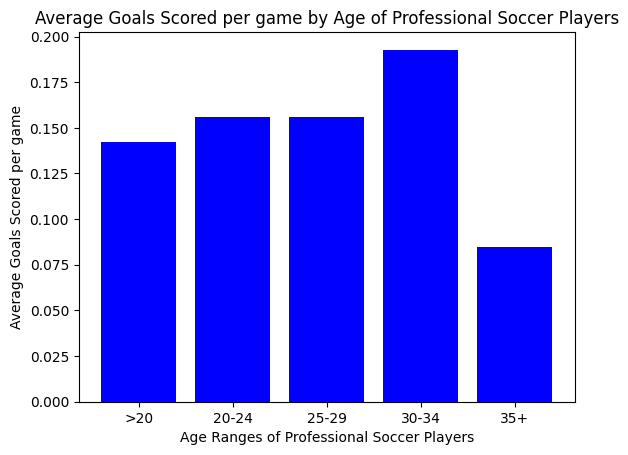

In [9]:
# Initialize dictionaries and lists
new_age_count = {}
nb20, nb25, nb30, nb35, na35 = [], [], [], [], []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals per match"]
    goalCheck = row["Goals"]

    # Skip rows with missing values
    if pd.isnull(age) or pd.isnull(goals) or pd.isnull(goalCheck):
        continue

    # Update age count
    if age in new_age_count:
        new_age_count[age] += 1
    else:
        new_age_count[age] = 1

    # Categorize goals based on age range
    if goalCheck > 0:
        if age < 20:
            nb20.append(goals)
        elif age < 25:
            nb25.append(goals)
        elif age < 30:
            nb30.append(goals)
        elif age < 35:
            nb35.append(goals)
        else:
            na35.append(goals)

# Compute averages safely
new_ranges = [">20", "20-24", "25-29", "30-34", "35+"]
new_values = [
    sum(nb20) / len(nb20) if nb20 else 0,
    sum(nb25) / len(nb25) if nb25 else 0,
    sum(nb30) / len(nb30) if nb30 else 0,
    sum(nb35) / len(nb35) if nb35 else 0,
    sum(na35) / len(na35) if na35 else 0,
]

# Plot the results
plt.bar(new_ranges, new_values, color="blue")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored per game")
plt.title("Average Goals Scored per game by Age of Professional Soccer Players")
plt.show()
